In [627]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data\\teco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [629]:
def naner(df,column):#function to create nan values instead of ' '
    lst = []
    for ques in df[column]:
        if ques == ' ':
            lst.append(np.nan)
        else:
            lst.append(ques)
    df[column] = lst

In [630]:
for col in df.columns:
    naner(df,col)

In [631]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [632]:
for column in df.columns:
    print(f"{column}:{df[column].unique()}") 

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [633]:

from sklearn.preprocessing import OneHotEncoder,LabelEncoder

def onehot_trans(col,df):
    encoder = OneHotEncoder()
    enc_df = encoder.fit_transform(df[[col]]).toarray()
    colnames = df[f"{col}"].unique().tolist()
    colnames_new = []
    for cols in colnames:
        colnames_new.append(f"{col}_{cols}")
    enc_df = pd.DataFrame(enc_df,columns=colnames_new)
    return enc_df

def label_trans(col):
    encoder = LabelEncoder()
    enc_df = encoder.fit_transform(df[col])
    enc_df = pd.DataFrame(enc_df,columns=[f"{col}_enc"])
    return enc_df

def trinarizer(col):
    tri_lst = []
    for val in df[col]:
        if val == 'Yes':
            tri_lst.append(1)
        elif val == 'No':
            tri_lst.append(0)
        elif val == 'No phone service':
            tri_lst.append(-1)
        elif val == 'No internet service':
            tri_lst.append(-1)
        elif val == np.nan:
            tri_lst.append(np.nan)
    return tri_lst


In [634]:
new_df = label_trans("Churn")
new_df = new_df.join(label_trans("Partner"))
new_df = new_df.join(label_trans("gender"))
new_df = new_df.join(label_trans("Dependents"))
new_df = new_df.join(label_trans("PaperlessBilling"))
new_df = new_df.join(label_trans("PhoneService"))

In [635]:
new_df.head()

,Churn_enc,Partner_enc,gender_enc,Dependents_enc,PaperlessBilling_enc,PhoneService_enc
0,0,1,0,0,1,0
1,0,0,1,0,0,1
2,1,0,1,0,1,1
3,0,0,1,0,0,0
4,1,0,0,0,1,1


In [636]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [637]:
new_df = new_df.join(onehot_trans("InternetService",df))
new_df = new_df.join(onehot_trans("PaymentMethod",df))
new_df = new_df.join(onehot_trans("Contract",df))
new_df = new_df.join(onehot_trans("TechSupport",df))
new_df = new_df.join(onehot_trans("OnlineBackup",df))
new_df = new_df.join(onehot_trans("DeviceProtection",df))
new_df = new_df.join(onehot_trans("MultipleLines",df))
new_df = new_df.join(onehot_trans("StreamingTV",df))
new_df = new_df.join(onehot_trans("StreamingMovies",df))

In [638]:
new_df.head()

,Churn_enc,Partner_enc,gender_enc,Dependents_enc,PaperlessBilling_enc,PhoneService_enc,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),Contract_Month-to-month,Contract_One year,Contract_Two year,TechSupport_No,TechSupport_Yes,TechSupport_No internet service,OnlineBackup_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,StreamingTV_No,StreamingTV_Yes,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service
0,0,1,0,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,1,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [639]:
tri_data = trinarizer("Churn")
df["Churn"] = tri_data

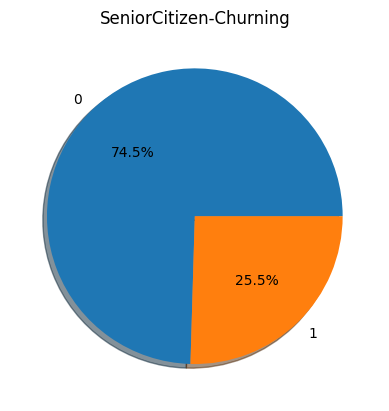

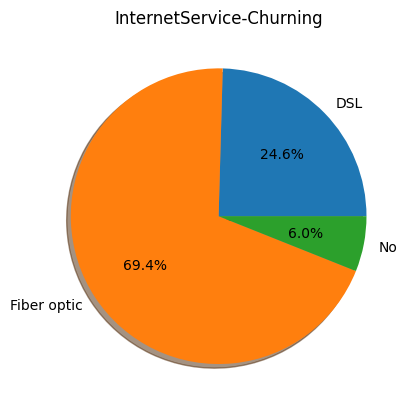

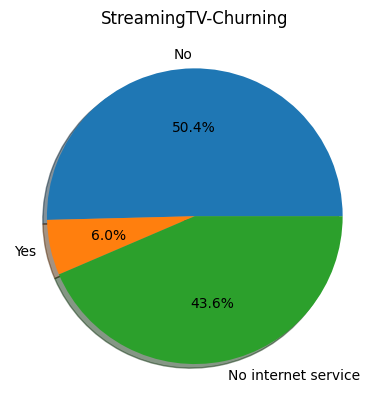

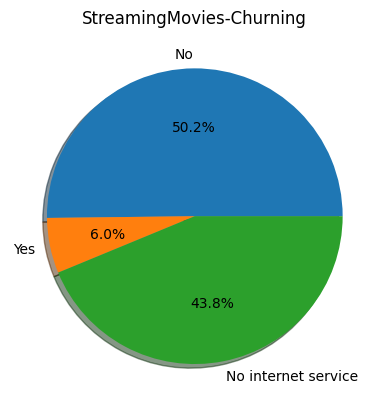

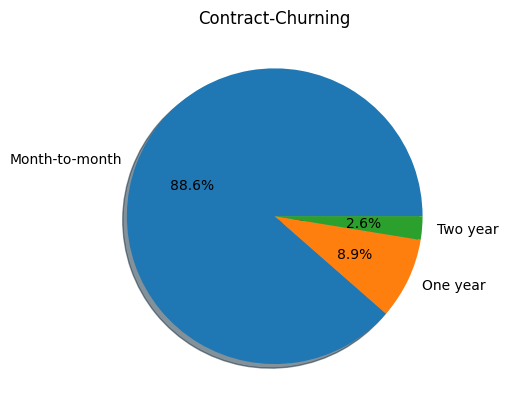

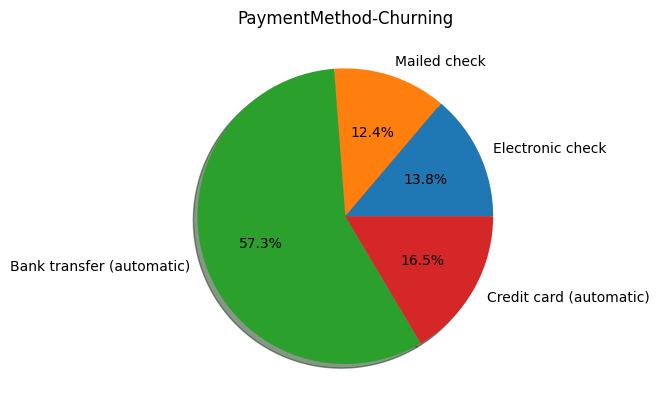

In [640]:
pi_features = df[['SeniorCitizen','InternetService','StreamingTV','StreamingMovies','Contract','PaymentMethod']] 

for ft in pi_features:    
    plt.pie(df.groupby(f'{ft}').Churn.sum(),labels=df[ft].unique(),autopct='%1.1f%%',shadow=True)
    plt.title(f'{ft}-Churning')
    plt.show()

In [641]:
num_dat = []
for val in df["Contract"]:
    if val == 'Month-to-month':
        num_dat.append(0)
    elif val == 'Two year':
        num_dat.append(2)
    elif val == 'One year':
        num_dat.append(1)
df['Contract'] = num_dat

In [642]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [643]:
num_dat = []
for val in df["PaymentMethod"]:
    if val == 'Mailed check':
        num_dat.append(0)
    elif val == 'Bank transfer (automatic)':
        num_dat.append(2)
    elif val == 'Electronic check':
        num_dat.append(1)
    elif val == 'Credit card (automatic)':
        num_dat.append(3)
df['PaymentMethod'] = num_dat

In [644]:
num_dat = []
for val in df["InternetService"]:
    if val == 'No':
        num_dat.append(0)
    elif val == 'Fiber optic':
        num_dat.append(2)
    elif val == 'DSL':
        num_dat.append(1)
df['InternetService'] = num_dat

In [645]:
cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in cols:
    tri_data = trinarizer(col)
    df[col] = tri_data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,-1,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,-1,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [646]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.325004,1.222916,0.069999,0.128212,0.127219,0.073548,0.167684,0.171234,0.690473,0.592219,1.422547,64.761692,2283.300441,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.778877,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.833755,0.491457,1.064952,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [647]:
df['TotalCharges'] = df['TotalCharges'].fillna(value=df['TotalCharges'].median())

In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [649]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [650]:
df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [651]:
mc=0
mnc = 0
fc=0
fnc = 0
for gen,churn in zip(df['gender'],df['Churn']):
    if gen == 'Male' and churn == 1:
        mc += 1
    elif gen == 'Male' and churn == 0:
        mnc += 1
    elif gen == 'Female' and churn == 1:
        fc += 1
    elif gen == 'Female' and churn == 0:
        fnc += 1
print(sum([mc,mnc,fc,fnc]),[mc,mnc,fc,fnc])

7043 [930, 2625, 939, 2549]


In [652]:
df.groupby('gender').Churn.sum()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [653]:
df.groupby('SeniorCitizen').Churn.sum()

SeniorCitizen
0    1393
1     476
Name: Churn, dtype: int64

In [654]:
df.groupby('InternetService').Churn.sum()

InternetService
0     113
1     459
2    1297
Name: Churn, dtype: int64

In [655]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,-1,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,-1,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,1


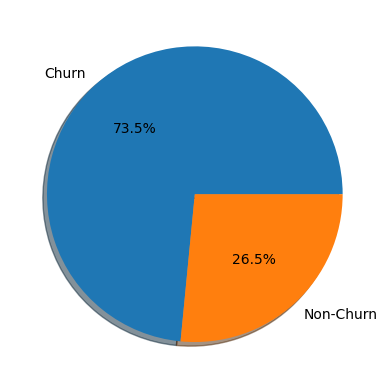

In [656]:
plt.pie(df.Churn.value_counts(),labels=['Churn','Non-Churn'],autopct='%1.1f%%',shadow=True)
plt.show()

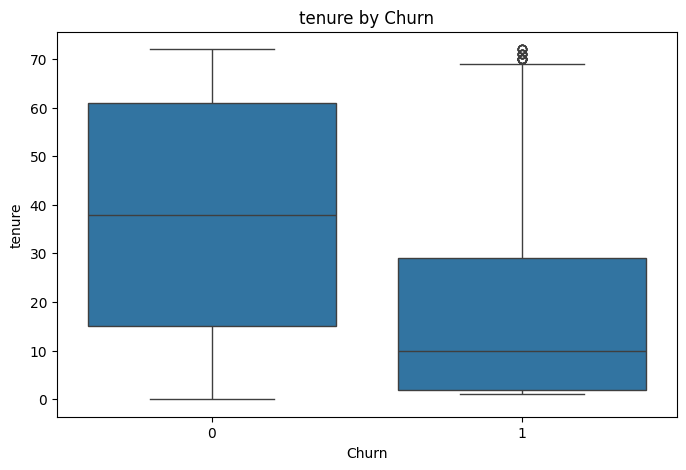

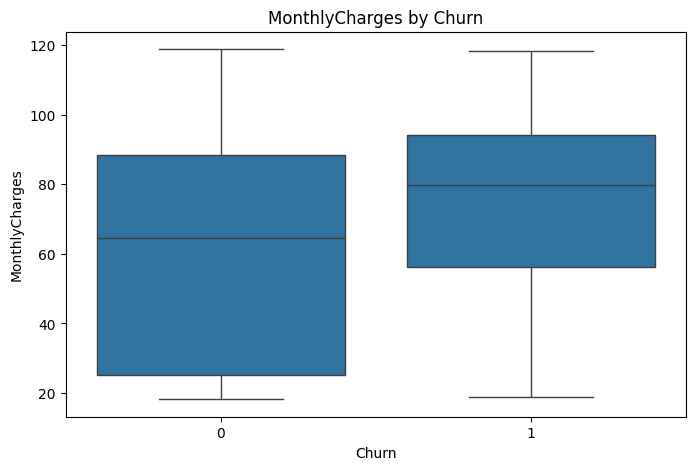

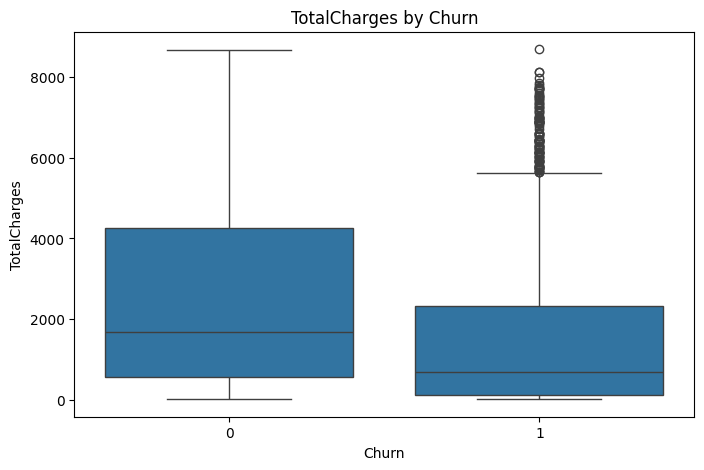

In [657]:
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')

<Axes: >

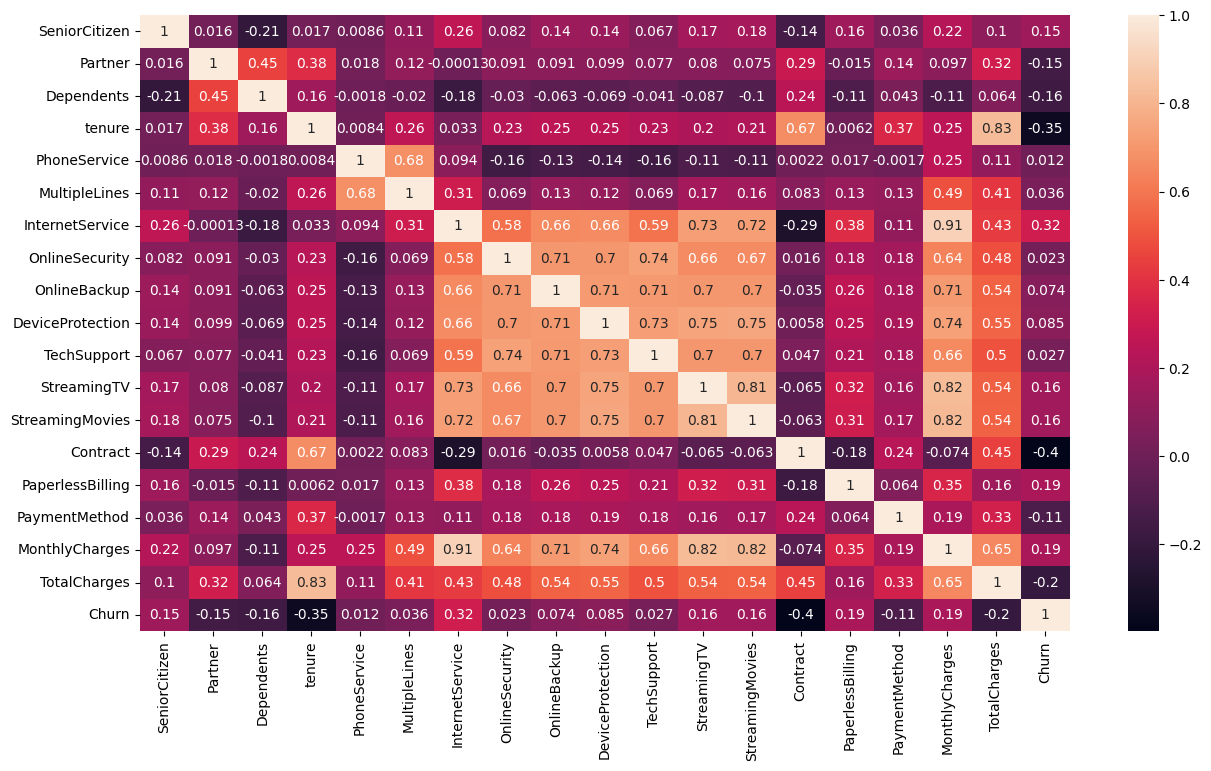

In [658]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(annot=True,data=corr)

In [659]:
for column in df.columns:
    print(f"{column}:{df[column].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[-1  0  1]
InternetService:[1 2 0]
OnlineSecurity:[ 0  1 -1]
OnlineBackup:[ 1  0 -1]
DeviceProtection:[ 0  1 -1]
TechSupport:[ 0  1 -1]
StreamingTV:[ 0  1 -1]
StreamingMovies:[ 0  1 -1]
Contract:[0 1 2]
PaperlessBilling:[1 0]
PaymentMethod:[1 0 2 3]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [660]:
new_df = new_df.join(df['SeniorCitizen'])
new_df = new_df.join(df['tenure'])
new_df = new_df.join(df['MonthlyCharges'])
new_df = new_df.join(df['TotalCharges'])

In [661]:
individual_features_df = []

for i in range(0,len(new_df.columns)-1):
    tmpdf = new_df[[new_df.columns[i],'Churn_enc']]
    tmpdf = tmpdf[tmpdf[new_df.columns[i]] != 0]
    individual_features_df.append(tmpdf)

individual_features_df

[      Churn_enc  Churn_enc
 0           NaN        NaN
 1           NaN        NaN
 2           1.0        1.0
 3           NaN        NaN
 4           1.0        1.0
 ...         ...        ...
 7038        NaN        NaN
 7039        NaN        NaN
 7040        NaN        NaN
 7041        1.0        1.0
 7042        NaN        NaN
 
 [7043 rows x 2 columns],
       Partner_enc  Churn_enc
 0               1          0
 8               1          1
 10              1          0
 12              1          0
 15              1          0
 ...           ...        ...
 7031            1          0
 7038            1          0
 7039            1          0
 7040            1          0
 7041            1          1
 
 [3402 rows x 2 columns],
       gender_enc  Churn_enc
 1              1          0
 2              1          1
 3              1          0
 6              1          0
 9              1          0
 ...          ...        ...
 7033           1          0
 7035           

In [662]:
import operator

all_correlations = new_df.corr()['Churn_enc'].drop('Churn_enc')

# Sort the correlations
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1), reverse=True)

print("Feature Correlations with Churn:\n")
for (key, value) in all_correlations:
    print('{:>20} : {:>15.2f}'.format(key, value))

Feature Correlations with Churn:

Contract_Month-to-month :            0.41
      TechSupport_No :            0.34
InternetService_Fiber optic :            0.31
PaymentMethod_Bank transfer (automatic) :            0.30
    OnlineBackup_Yes :            0.27
 DeviceProtection_No :            0.25
      MonthlyCharges :            0.19
PaperlessBilling_enc :            0.19
       SeniorCitizen :            0.15
  StreamingMovies_No :            0.13
      StreamingTV_No :            0.13
StreamingTV_No internet service :            0.06
StreamingMovies_No internet service :            0.06
   MultipleLines_Yes :            0.04
    PhoneService_enc :            0.01
          gender_enc :           -0.01
    MultipleLines_No :           -0.01
MultipleLines_No phone service :           -0.03
DeviceProtection_No internet service :           -0.07
OnlineBackup_No internet service :           -0.08
PaymentMethod_Credit card (automatic) :           -0.09
PaymentMethod_Electronic check :     

In [663]:
golden_features_list = {key:value for key,value in all_correlations if abs(value) >= 0.3 or abs(value) <= -0.3}
print("There is {} strongly correlated values with Churn:\n{}".format(len(golden_features_list),golden_features_list.keys())) #fills the braces with respective arguments

There is 6 strongly correlated values with Churn:
dict_keys(['Contract_Month-to-month', 'TechSupport_No', 'InternetService_Fiber optic', 'PaymentMethod_Bank transfer (automatic)', 'Contract_Two year', 'tenure'])


In [ ]:
features_df = pd.DataFrame(new_df[[col for col in golden_features_list.keys()]])

features_df["Churn"] = df['Churn']

features_df.head()

,Contract_Month-to-month,TechSupport_No,InternetService_Fiber optic,PaymentMethod_Bank transfer (automatic),Contract_Two year,tenure,Churn
0,1.0,1.0,0.0,1.0,0.0,1,0
1,0.0,1.0,0.0,0.0,0.0,34,0
2,1.0,1.0,0.0,0.0,0.0,2,1
3,0.0,0.0,0.0,0.0,0.0,45,0
4,1.0,1.0,1.0,1.0,0.0,2,1


<Axes: >

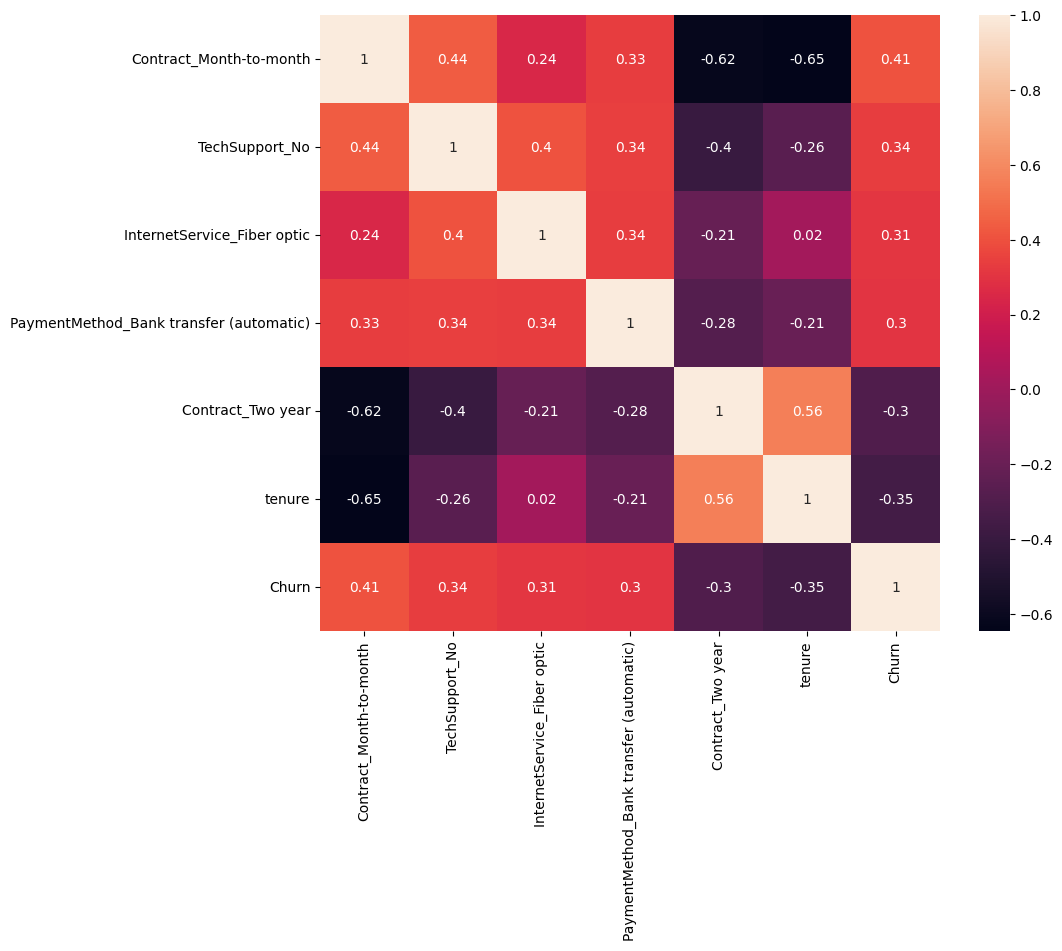

In [665]:
corr = features_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(annot=True,data=corr)

In [666]:
for column in df.columns:
    print(f"{column}:{df[column].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[-1  0  1]
InternetService:[1 2 0]
OnlineSecurity:[ 0  1 -1]
OnlineBackup:[ 1  0 -1]
DeviceProtection:[ 0  1 -1]
TechSupport:[ 0  1 -1]
StreamingTV:[ 0  1 -1]
StreamingMovies:[ 0  1 -1]
Contract:[0 1 2]
PaperlessBilling:[1 0]
PaymentMethod:[1 0 2 3]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [ ]:
df.to_csv("data\\preprocessed_telco_churn.csv")


In [ ]:
features_df.to_csv("data\\features.csv",index=False)

NameError: name 'plt' is not defined

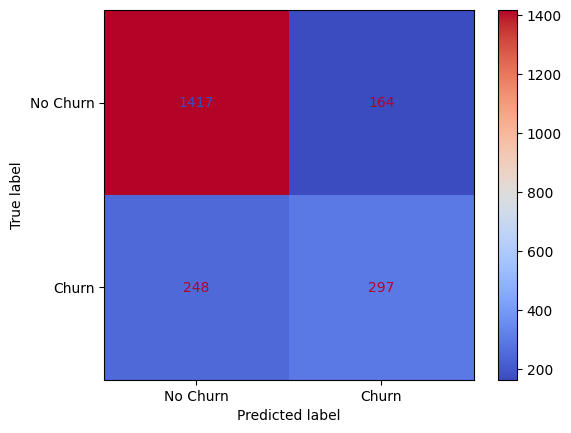

In [3]:
from model import train_model,predict_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pandas as pd

model = train_model('xgbc')

df = pd.read_csv('data\\collected_data.csv')

features = df[[col for col in df.columns if col != 'Churn']]
target = df["Churn"]

na,x_test,na,y_test = train_test_split(features,target,test_size=0.3,random_state=1)

y_pred,score = predict_model(model)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()